In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
# Flatten the images.
train_images = train_images.reshape((-1, 3072))
test_images = test_images.reshape((-1, 3072))

print(train_images.shape)
print(test_images.shape)

(50000, 3072)
(10000, 3072)


In [6]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


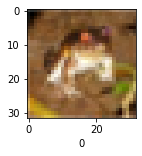

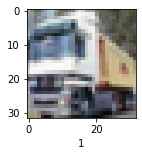

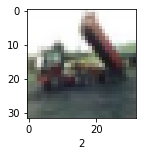

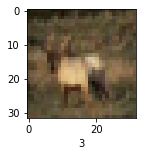

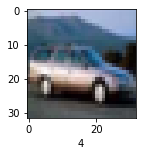

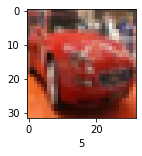

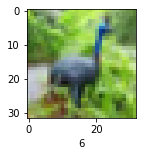

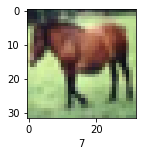

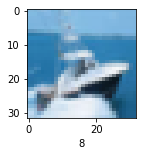

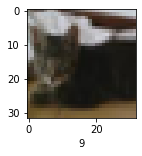

In [8]:
for i in range(10):
    plt.figure(figsize = (15,2))
    plt.xlabel(i)
    plt.imshow(x_train[i])
    

In [9]:
# Build the model.
model = Sequential([
  Dense(3072, activation='relu', input_shape=(3072,)),
  Dense(1536, activation='relu'),
  Dense(768, activation='relu'),
  Dense(384, activation='relu'),
  Dense(192, activation='relu'),
  Dense(10, activation='softmax'),
])

In [10]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3072)              9440256   
                                                                 
 dense_1 (Dense)             (None, 1536)              4720128   
                                                                 
 dense_2 (Dense)             (None, 768)               1180416   
                                                                 
 dense_3 (Dense)             (None, 384)               295296    
                                                                 
 dense_4 (Dense)             (None, 192)               73920     
                                                                 
 dense_5 (Dense)             (None, 10)                1930      
                                                                 
Total params: 15,711,946
Trainable params: 15,711,946
No

In [11]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=120,
  batch_size=1000,
)

Epoch 1/120
50/50 [==============================] - 5s 56ms/step - loss: 2.3848 - accuracy: 0.1554
Epoch 2/120
50/50 [==============================] - 3s 51ms/step - loss: 1.9594 - accuracy: 0.2726
Epoch 3/120
50/50 [==============================] - 2s 46ms/step - loss: 1.7992 - accuracy: 0.3495
Epoch 4/120
50/50 [==============================] - 2s 46ms/step - loss: 1.7225 - accuracy: 0.3773
Epoch 5/120
50/50 [==============================] - 2s 47ms/step - loss: 1.6708 - accuracy: 0.4002
Epoch 6/120
50/50 [==============================] - 2s 47ms/step - loss: 1.6149 - accuracy: 0.4222
Epoch 7/120
50/50 [==============================] - 2s 46ms/step - loss: 1.5662 - accuracy: 0.4409
Epoch 8/120
50/50 [==============================] - 2s 46ms/step - loss: 1.5145 - accuracy: 0.4599
Epoch 9/120
50/50 [==============================] - 2s 47ms/step - loss: 1.4892 - accuracy: 0.4685
Epoch 10/120
50/50 [==============================] - 2s 47ms/step - loss: 1.4533 - accuracy: 0.4817

# after 120 epoch, the accuracy is 98 percent

In [12]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 2s 5ms/step - loss: 4.5299 - accuracy: 0.5230


[4.529915809631348, 0.5230000019073486]

In [13]:
# Save the model to disk.
model.save_weights('model_cifar10.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # 

# Check our predictions against the ground truths.
print(test_labels[:10]) # 

[4 8 7 0 6 6 1 6 2 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]
